# TF Eager
[ref](https://blog.csdn.net/wizardforcel/article/details/81211571)

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
if tf.version.VERSION < '2.0.0':
    import tensorflow.contrib.eager as tfe
    tfe.enable_eager_execution()
# eager is enabled default in tf 2.0
#import tensorflow.compat.v1 as tf1
#tf1.disable_eager_execution()

## create a model using keras API

In [2]:
from tensorflow.keras import Model
from tensorflow.layers import Dense

class LR(Model):
    def __init__(self):
        super().__init__()
        self.hidden = Dense(10, activation=tf.nn.relu)
        self.output_layer = Dense(2, activation=None)
    def call(self, x):
        x = self.hidden(x)
        x = self.output_layer(x)
        return x
    def loss(self, inputs, target):
        logits = self.call(inputs)
        loss = tf.losses.sparse_softmax_cross_entropy(labels=target, logits=logits)
        return loss

## dummy data

In [3]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, noise=0.1, random_state=2018)

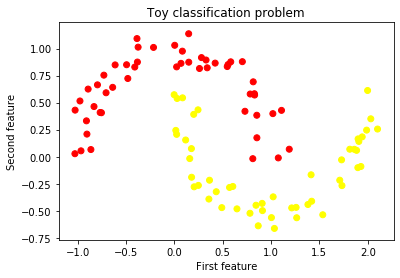

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.autumn)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('Toy classification problem')
plt.show()

## train 

In [5]:
num_epochs = 10
inputs = tf.constant(x)
target = tf.constant(y)

model = LR()
optimizer = tf.train.GradientDescentOptimizer(5e-1)
for epoch in range(num_epochs):
    with tfe.GradientTape() as tape:
        loss = model.loss(inputs, target)
        grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(zip(grads, model.variables))
    print('Epoch {} Loss {:.4f}'.format(epoch, loss.numpy()))

Epoch 0 Loss 0.6686
Epoch 1 Loss 0.5993
Epoch 2 Loss 0.5485
Epoch 3 Loss 0.5085
Epoch 4 Loss 0.4761
Epoch 5 Loss 0.4500
Epoch 6 Loss 0.4297
Epoch 7 Loss 0.4136
Epoch 8 Loss 0.4001
Epoch 9 Loss 0.3886
